In [83]:
SAVE = True 
SAVE_PATH = "../charts/"
DATA_STORE_PATH_BASE = "../store/week1/"
DATA_STORE_PATH_WEEK = "../store/week2/"

In [84]:

EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

In [87]:
def drop_none_unique_peers(df:pd.DataFrame) -> pd.DataFrame:
    df_filtered = df.drop_duplicates(subset=['peer'], keep=False)
    df_filtered = df_filtered[df_filtered["peer"] != MY_PEERID]
    df_filtered = df_filtered.reset_index()
    return df_filtered

In [88]:
def make_peerid_short(df:pd.DataFrame) -> pd.DataFrame:
    df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
    return df 

In [89]:

df = pd.read_csv(DATA_STORE_PATH_BASE + "found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWHsshUtLVTUccPiFdmupxm3fhTgMnnZM76KPfhS...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWCkT234YfDHFvj9wzDzwTwJxe6z35TCe1MfSxTY...,NaN,NaN
4,12D3KooWEja9effvbfwyuf4xVuLLpRL9fFYXG7cTyWnkgt...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


In [90]:

df = df[df["peer"] != MY_PEERID]
total = len(df["peer"].unique())
total

35083

In [91]:
cids = []
peers = set()
for i, cid in enumerate(df["cid"].dropna().unique()[:20]):
    if cid != None or cid != EMPTY_CID:
        cids.append(cid)
print(cids)

for i, peer in enumerate(df["peer"]):
    try: 
        cid = df["cid"][i+1]
        if cid in cids:
            cids.remove(cid)
            peers.add(peer)
    except:
        continue
print(peers)

['QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn', 'QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5', 'QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP', 'bafybeiav25f3lduu6x2ljzjmctocac3k5xh2tph5ihpv64icc7lf3qudra', 'QmUU2HcUBVSXkfWPUc3WUSeCMrWWeEJTuAgR9uyWBhh9Nf', 'QmdbGV12ji7DHvVXYiaWvWJJmnYy3V5of8fpkripPGo3jK', 'QmT1Ja1kcMh3E7xHWAc49N6BpXnWJDPCTMUWXDvnKAdvJu', 'QmT2SRqXr8KvmuQTnvxvKm6NaVy9ucYYPRpPiQp78GFP1w', 'QmNrJu5JW5RWTz2G2jgNkgCgp7RHHEk7Whi317bUNnerfu', 'QmaDGBwVyFcjiLXzwYWYDGjM2cnKmWBXHSQkCZYeYgChDj', 'Qma3747yKcgDfxay1gWHKMJmimeWA7Vi7xoVE6KR2oyhdW', 'QmYWAifyw2V5dEq7c5GgdSPffeKoYXQZggnYzw5RbXpig4', 'QmezUGmr8aGCkyBEcCGVDVQQP6mNgmmhCXYZCW5HYYXD62', 'QmepZt9TvmypWhq51TQAYJRs7bZicV3BefahjvY7exZCdL', 'QmSHR5wNWmNdjNZ5RDffjcjbNQawNX5AqBauGcgbhJERf1', 'QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk', 'QmQRgDkSAqWAtzqQBKEbwV731KcbPtYun7KkEqAGGcFr7o', 'QmcPUJHg9jz4XXHd8NVR4LVxXCkhcXU51a13cGDu2W4CDE', 'QmeeRMns22TKCaLG69zKwPxkhWUCy9YuED9

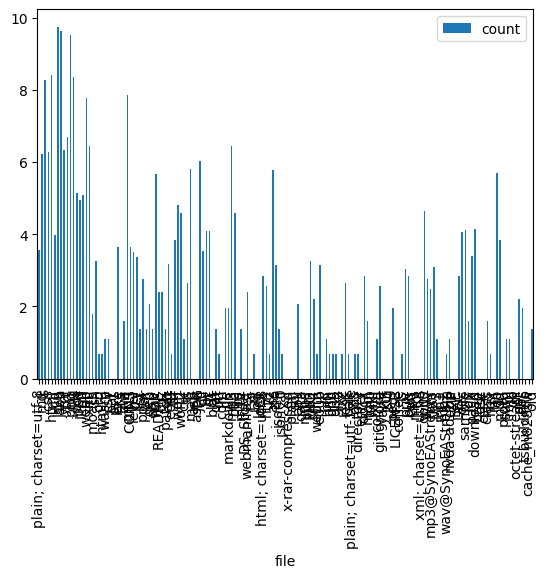

In [92]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[-1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
#del types_of_files["png"]
#del types_of_files["svg"]
#del types_of_files["json"]
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(np.log(v))
types_of_files = dict(types_of_files)
types_of_files = reversed_sort_dict_by_value(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()
if SAVE: 
    plt.savefig(SAVE_PATH+"format_count.png",bbox_inches='tight')

In [93]:
#df_cids = df.dropna(subset=["cid"])[:1000]
#df_cids[~df_cids['cid'].duplicated(keep=False)]["peer"].to_clipboard()


In [94]:
import pandas as pd 
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df.drop_duplicates()
unique_nr_peers = len(df["peer"].unique())
print("number of unique peers with IPNS CID",unique_nr_peers)

number of unique peers with IPNS CID 333


## From cid data 

In [95]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "cid_data.csv")
#df = drop_none_unique_peers(df)
df = make_peerid_short(df)
df.head()

,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


In [96]:
from collections import defaultdict
import copy
import numpy as np

peer_size = {}
peer_size["peer"] = df["peer"]
peer_size["size"] = df["size"]

print("sum", df["size"].sum()/10**9)

peer_size_count = defaultdict(int)
size_max = -1
for i, p in enumerate(peer_size["peer"]): 
    peer_size_count[p]+=peer_size["size"][i]
    if peer_size_count[p] > size_max: size_max = peer_size_count[p]
print("max",size_max / 10**9)


peer_size_count_no_filter = copy.deepcopy(peer_size_count)
peer_size_count_no_filter = reversed_sort_dict_by_value(peer_size_count_no_filter)
#peer_size_count = {p:s for p,s in peer_size_count.items() if s > 2**30}

sum 175.349617256
max 65.825068928


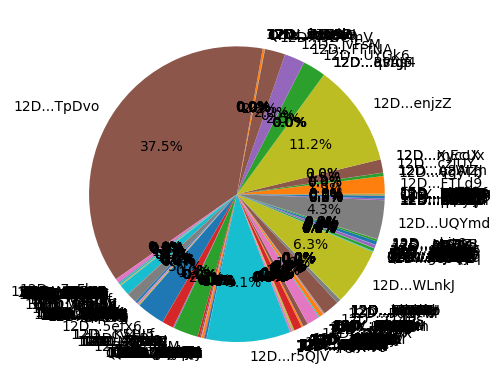

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(list(peer_size_count.values()), labels=list(peer_size_count.keys()), autopct='%1.1f%%')
#plt.title("percentage of peer sizes")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_pie.png",bbox_inches='tight')

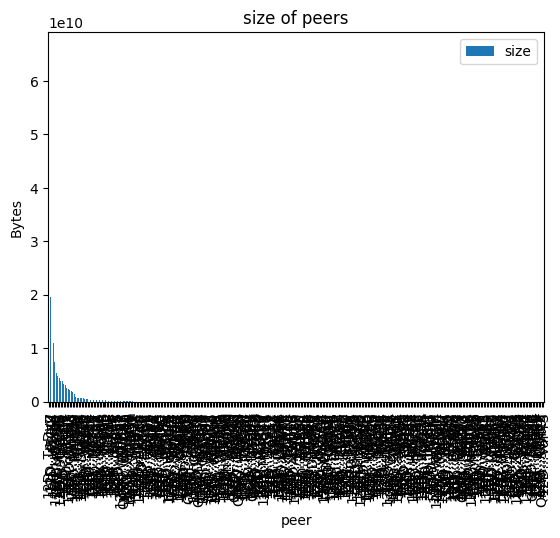

In [98]:
peer_size_count = reversed_sort_dict_by_value(peer_size_count)
size_df = pd.DataFrame({"peer":list(peer_size_count.keys()), "size":list(peer_size_count.values())})
ax = size_df.set_index("peer").plot.bar(title="size of peers")
ax.set_ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size.png",bbox_inches='tight')

333
max 65.825068928
min 0.0
mean 0.2632877965975976
sum 175.349672534


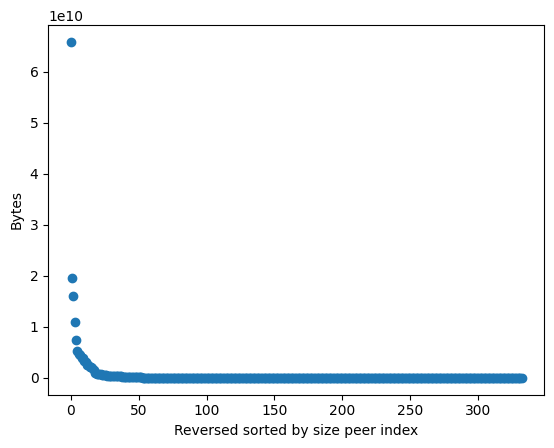

In [99]:

fig, ax = plt.subplots()
peer_size_count_no_filter = {peer_id: size for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}
print(len(peer_size_count_no_filter))
peer_size_count_df = pd.DataFrame({"peers":[i for i in range(len(peer_size_count_no_filter))], "bytes":peer_size_count_no_filter.values()})
GB = 10**9
print("max", peer_size_count_df.values.max()/GB)
print("min", peer_size_count_df.values.min()/GB)
print("mean",peer_size_count_df.values.mean()/GB)
print("sum", peer_size_count_df.values.sum()/GB)
ax.scatter([i for i in range(len(peer_size_count_no_filter))],list(peer_size_count_no_filter.values()))
#plt.title("All peer sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all.png",bbox_inches='tight')


/tmp/ipykernel_42690/4000406017.py:2: RuntimeWarning: divide by zero encountered in log2
  peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}


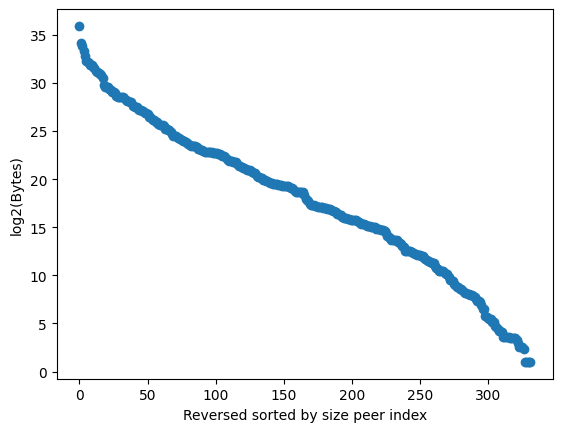

In [100]:
fig, ax = plt.subplots()
peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter_log))],list(peer_size_count_no_filter_log.values()))
#plt.title("All peers log2 of sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("log2(Bytes)")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all_log.png",bbox_inches='tight')

In [101]:
all_formats = df["format"].unique()
all_formats = sorted(all_formats.tolist())
print(all_formats)
print(len(all_formats))

['application/atom+xml', 'application/epub+zip', 'application/gzip', 'application/jar', 'application/javascript', 'application/json', 'application/octet-stream', 'application/pdf', 'application/rss+xml', 'application/vnd.debian.binary-package', 'application/vnd.microsoft.portable-executable', 'application/vnd.ms-fontobject', 'application/vnd.ms-powerpoint', 'application/vnd.oasis.opendocument.spreadsheet', 'application/vnd.openxmlformats-officedocument.presentationml.presentation', 'application/vnd.openxmlformats-officedocument.wordprocessingml.document', 'application/wasm', 'application/x-7z-compressed', 'application/x-executable', 'application/x-java-applet', 'application/x-mobipocket-ebook', 'application/x-ole-storage', 'application/x-rar-compressed', 'application/x-sharedlib', 'application/x-xz', 'application/zip', 'audio/flac', 'audio/mpeg', 'audio/ogg', 'audio/wav', 'font/otf', 'font/ttf', 'font/woff', 'font/woff2', 'image/bmp', 'image/gif', 'image/jpeg', 'image/png', 'image/svg+

<Axes: xlabel='number of files with format', ylabel='format'>

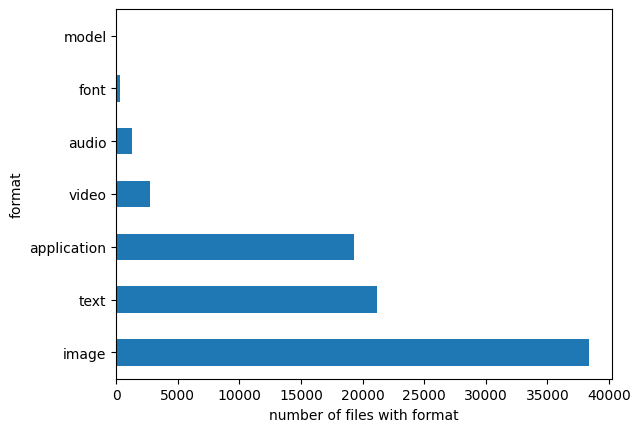

In [102]:
format_count = df["format"]
simple_format = lambda f: f.split("/")[0]
format_count = format_count.apply(simple_format)
format_count.value_counts().plot.barh(xlabel="number of files with format", ylabel="format")


83099
number of formats 63


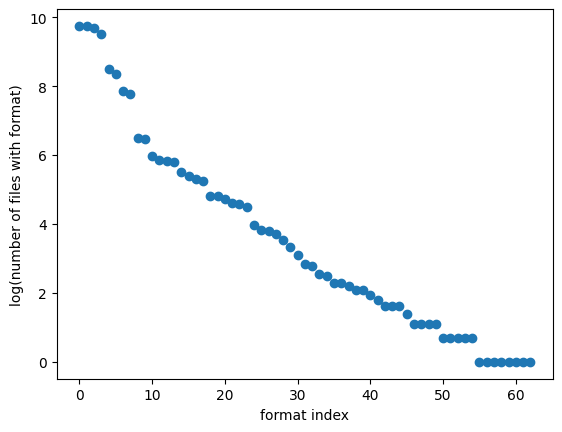

In [103]:
format_ = df["format"]
form_count = format_.value_counts()
print(form_count.sum())
form_count = np.log(form_count)
#form_count = form_count.sort_index()
form_count = form_count.sort_values()
form_count = form_count.iloc[::-1]

print("number of formats", len(form_count))
fig, ax = plt.subplots()
ax.scatter(range(0, len(form_count)), form_count)
plt.xlabel("format index")
plt.ylabel("log(number of files with format)")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_with_format.png",bbox_inches='tight')

19278
17124
2154


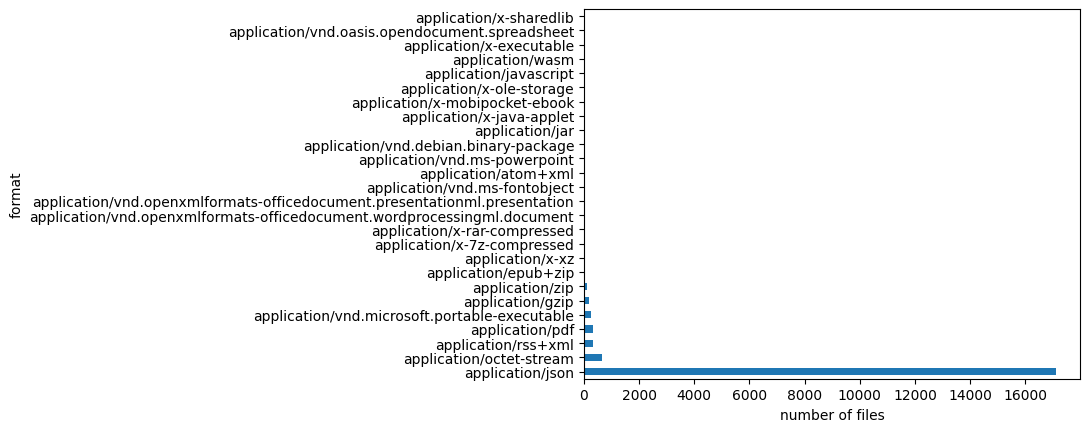

In [104]:
format_ = df["format"]
form_count = format_.value_counts()
form_count = form_count[form_count.index.str.startswith('application/')]
#form_count = form_count[form_count.values > 100]
form_count.plot.barh()
plt.xlabel("number of files")
print(form_count.sum())
print(form_count["application/json"])
print(form_count.sum() - form_count["application/json"])


if SAVE: 
    plt.savefig(SAVE_PATH+"number_of_files_with_application_formats.png",bbox_inches='tight')

96


peer
12D...8xd2R    10000
12D...TdGmf     2008
12D...7z3La      690
12D...FdtEA      618
12D...XMK1E      536
Name: count, dtype: int64

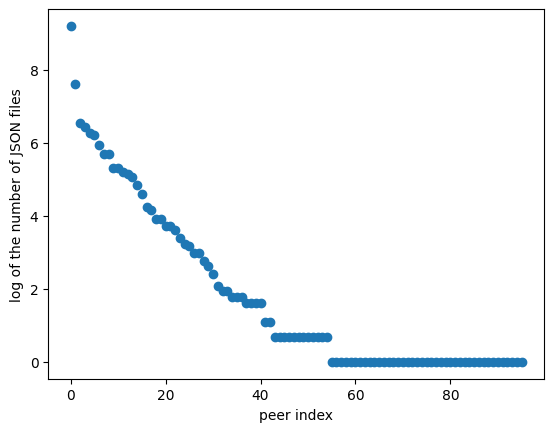

In [105]:

format_ = df[["format", "peer"]]
peers_with_json = format_[format_["format"] == "application/json"]
peers_with_json = peers_with_json.reset_index()
peers_with_json = peers_with_json["peer"]
fig, ax = plt.subplots()
pwjc = peers_with_json.value_counts()
ax.scatter(range(0, len(pwjc)), np.log(pwjc.values))
plt.xlabel("peer index")
plt.ylabel("log of the number of JSON files")

if SAVE: 
    plt.savefig(SAVE_PATH+"number_of_json_files_hosted_by_peers.png",bbox_inches='tight')

print(len(pwjc))
pwjc.head()

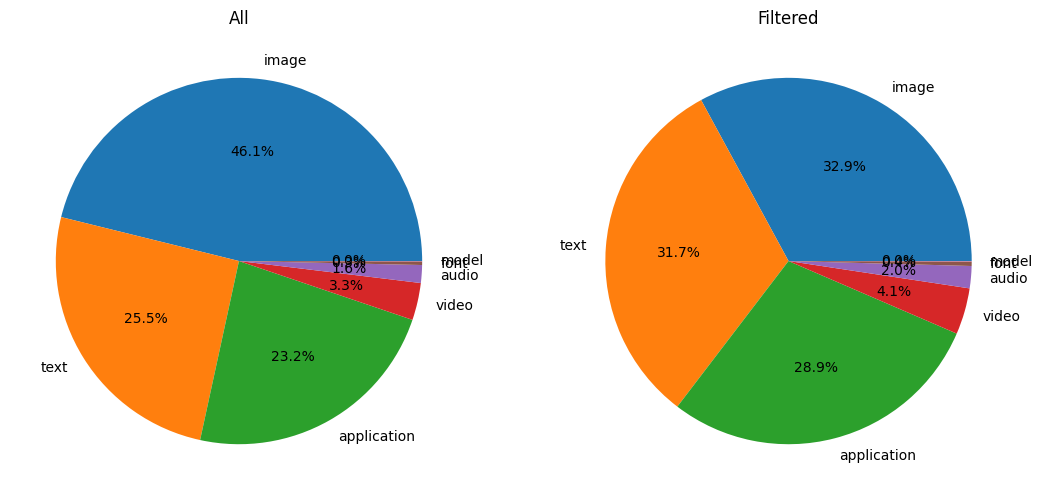

In [106]:
NUMBER_OF_TOP = 1
format_ = df[["peer", "format"]]
form_count = format_.groupby(["peer"])["format"].value_counts().unstack(fill_value=0)
form_count["total"] = form_count.sum(axis=1)
drop = form_count.nlargest(NUMBER_OF_TOP, "total").index
form_count = format_[~format_["peer"].isin(drop)]
form_count = form_count["format"]

simple_format = lambda f: f.split("/")[0]
form_count = form_count.apply(simple_format)
form_count = form_count.value_counts()
total = form_count.sum()



fvc = df["format"].apply(simple_format)
fvc = fvc.value_counts() 
fvc = fvc.reindex(fvc.keys())

temp = pd.DataFrame()
temp["All"] = fvc
temp["Filtered"] = form_count


temp[["All", "Filtered"]].plot.pie(subplots = True, 
                            legend= False, 
                            ylabel="",
                            title=["All", "Filtered"],
                            figsize =(13,15),
                            autopct='%1.1f%%')


if SAVE: 
    plt.savefig(SAVE_PATH+"number_of_files_pie_all_vs_filtered.png",bbox_inches='tight')

38345


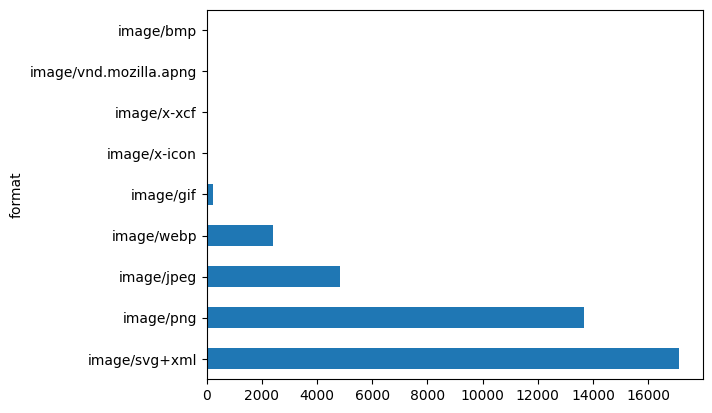

In [107]:
format_ = df["format"]
form_count = format_.value_counts()
form_count = form_count[form_count.index.str.startswith('image/')]
#form_count = form_count[form_count.values > 100]
form_count.plot.barh()
print(form_count.sum())
#print(form_count["application/json"])
#print(form_count.sum() - form_count["application/json"])



number of peers with image/svg+xml 17122


Text(0, 0.5, 'log of the number of files')

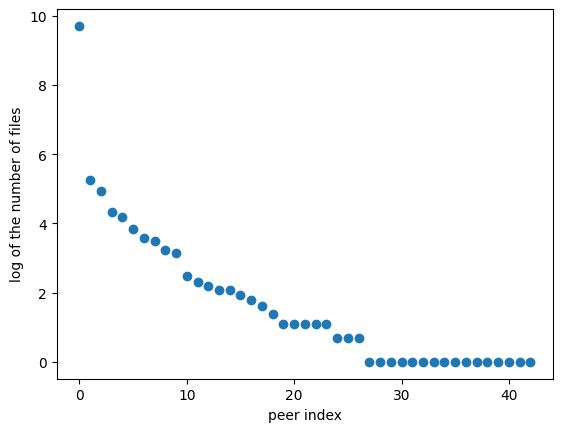

In [108]:
format_ = df[["format", "peer"]]
peers_with_format = format_[format_["format"] == "image/svg+xml"]
peers_with_format = peers_with_format.reset_index()
peers_with_json = peers_with_format["peer"]
print("number of peers with image/svg+xml", len(peers_with_format))
fig, ax = plt.subplots()
pwjc = peers_with_json.value_counts()
ax.scatter(range(0, len(pwjc)), np.log(pwjc.values))
plt.xlabel("peer index")
plt.ylabel("log of the number of files")



max 16384
min 1
mean 249.54654654654655
sum 83099


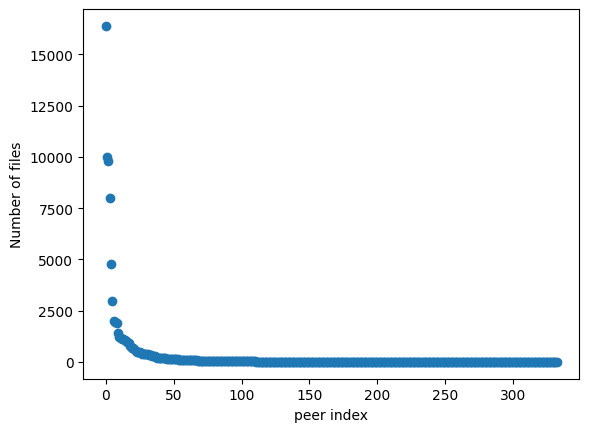

In [109]:

file_per_peer = df["peer"].value_counts()
print("max", file_per_peer.max())
print("min", file_per_peer.min())
print("mean",file_per_peer.mean())
print("sum", file_per_peer.sum())
fig, ax = plt.subplots()
ax.scatter(range(0, len(file_per_peer)), file_per_peer)
plt.ylabel("Number of files")
plt.xlabel("peer index")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_per_peer.png",bbox_inches='tight')



max 9.704060527839234
min 0.0
mean 2.1843206990476065
sum 727.378792782853


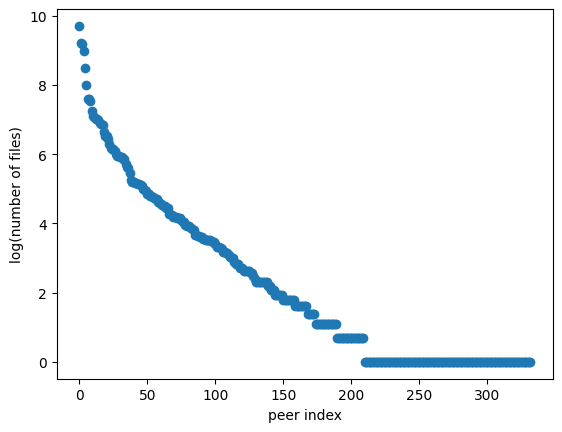

In [110]:
file_per_peer = np.log(df["peer"].value_counts())
print("max", file_per_peer.max())
print("min", file_per_peer.min())
print("mean",file_per_peer.mean())
print("sum", file_per_peer.sum())
fig, ax = plt.subplots()
ax.scatter(range(0, len(file_per_peer)), file_per_peer)
plt.ylabel("log(number of files)")
plt.xlabel("peer index")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_per_peer_log.png",bbox_inches='tight')



average file size 2.1101290900732863
total size 175.349617256


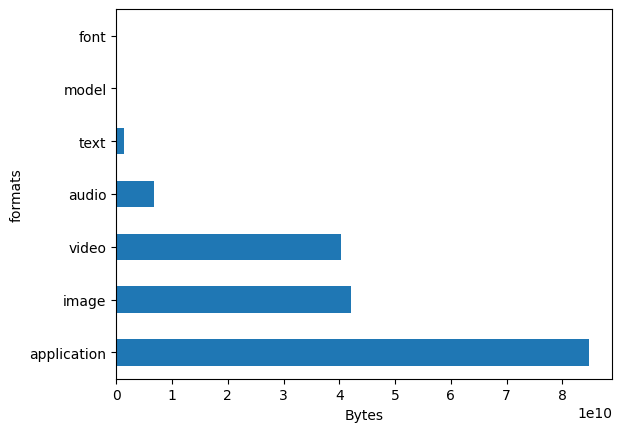

In [111]:
format_size_count = defaultdict(int)
_sum = 0
print("average file size", df["size"].mean()/10**6)
for i, f in enumerate(df["format"]):
    size =  df["size"][i]
    format_size_count[f.split("/")[0]] += size
    _sum += size
print("total size",_sum / 10**9)

format_size_count = {f:s for f,s in format_size_count.items() if s > 2**0}
format_size_count = reversed_sort_dict_by_value(format_size_count)
format_size_df = pd.DataFrame({"formats":list(format_size_count.keys()),"size":format_size_count.values()})
format_size_df = format_size_df.set_index("formats")
format_size_df.plot.barh(xlabel="Bytes",legend=False)


if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_size.png",bbox_inches='tight')

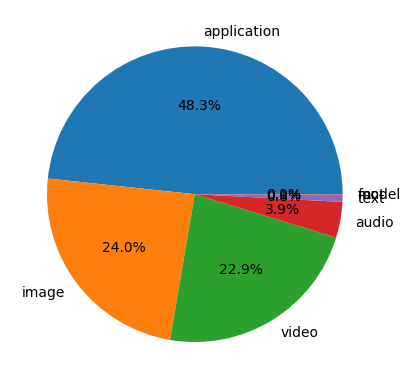

In [112]:

fig, ax = plt.subplots()
ax.pie(list(format_size_count.values()), labels=list(format_size_count.keys()), autopct='%1.1f%%')
#plt.title("Files format as percentage of file size ")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_size_prec.png",bbox_inches='tight')

In [113]:

df.head()

,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


In [114]:
#df_format_prec = df.groupby(['peer', 'format']).size().unstack(fill_value=0)
#df_format_prec = df_format_prec.div(df_format_prec.sum(axis=1), axis=0) * 100
#df_format_prec.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.xlabel('Peer')
#plt.ylabel('Percentage')
#plt.title('Formats used by peers')
#plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#
#if SAVE: 
#    plt.savefig(SAVE_PATH+"formats_used_by_nodes.png",bbox_inches='tight')
#

In [115]:
#df_temp = df.copy()
#df_temp["filename"] = df_temp["filename"].apply(lambda f: str(f))
#df_temp["filename"] = df_temp["filename"].apply(lambda f: ''.join([c for c in f if not c.isdigit()]))
#df_temp["filename"] = df_temp["filename"].apply(lambda f: f.split(".")[-1])
#for i, filename in enumerate(df_temp["filename"]):
#    if filename == "NONE":
#        df_temp["filename"][i] = df_temp["format"][i]
#df_file_name_peer = df_temp.groupby(['peer', 'filename']).size().unstack(fill_value=0)
#df_file_name_peer= df_file_name_peer.div(df_file_name_peer.sum(axis=1), axis=0) * 100
#df_file_name_peer.plot(kind='bar', stacked=True, figsize=(10, 6))
#plt.xlabel('Peer')
#plt.ylabel('Percentage')
#plt.title('File types used by peers')
#plt.legend(title='File type', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()


In [116]:
df.head()

,peer,cid,filename,size,format
0,12D...vvKGa,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
1,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,CODE_OF_CONDUCT.md,5239,text/plain; charset=utf-8
2,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,LICENSE,34444,text/plain; charset=utf-8
3,QmY...yJwiJ,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU...,config.js,2487,text/plain; charset=utf-8
4,QmY...yJwiJ,/ipfs/QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUP...,style.css,9105,text/plain; charset=utf-8


14
['CODE_OF_CONDUCT.md', 'ARCHITECTURE.md', 'DEPLOYMENT.md', 'OVERVIEW.md', 'PHILOSOPHY.md', 'README.md', 'start.md', 'community_modules.md', 'discuss.md', 'admins.md', 'advanced_logging.md', 'advanced_ssl_config.md', 'anonymous_logins.md', 'authentication.md', 'backups.md', 'certificates.md', 'chatrooms.md', 'components.md', 'configure.md', 'console.md', 'contributing.md', 'coturn.md', 'creating_accounts.md', 'cyrus_sasl.md', 'data_storage.md', 'depends.md', 'certmanager.md', 'configmanager.md', 'hostmanager.md', 'loggingmanager.md', 'moduleapi.md', 'modulemanager.md', 'portmanager.md', 'rostermanager.md', 's2smanager.md', 'sessionmanager.md', 'stanza_router.md', 'statsmanager.md', 'storagemanager.md', 'usermanager.md', 'events.md', 'global_modules.md', 'http.md', 'moduleapi.md', 'mod_adhoc.md', 'mod_storage_sql.md', 'modules.md', 'http.md', 'network.md', 'roster.md', 'sessions.md', 'telnet.md', 'adhoc.md', 'argparse.md', 'array.md', 'async.md', 'bit53.md', 'bitcompat.md', 'cache.md'

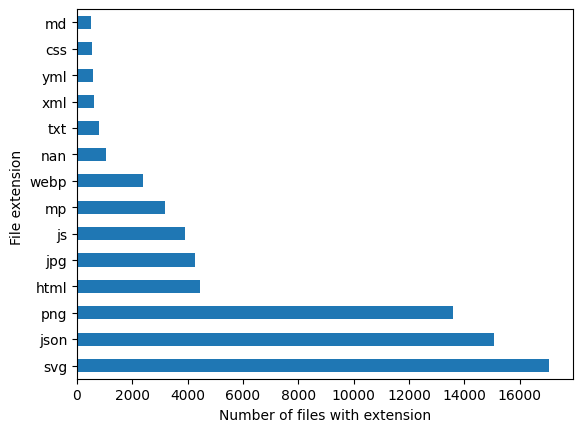

In [117]:
file_type_count = defaultdict(int)
markdown_files = []
for t in df["filename"]:
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    if ftype == "md": 
        markdown_files.append(t)
    file_type_count[ftype] += 1 

file_type_count = {t:c for t,c in file_type_count.items() if c > 500}
file_type_count = reversed_sort_dict_by_value(file_type_count)
print(len(file_type_count))

print(markdown_files)
print("number of markdown files:", len(markdown_files))

file_type_count = dict(file_type_count)
file_type_count = pd.DataFrame({"filetype": list(file_type_count.keys()), "files":list(file_type_count.values())})
file_type_count = file_type_count.set_index("filetype")
file_type_count.plot.barh(legend=False)
#plt.title("Files extinction occurrences")
plt.xlabel("Number of files with extension")
plt.ylabel("File extension ")

if SAVE: 
    plt.savefig(SAVE_PATH+"files_extensions_count.png",bbox_inches='tight')


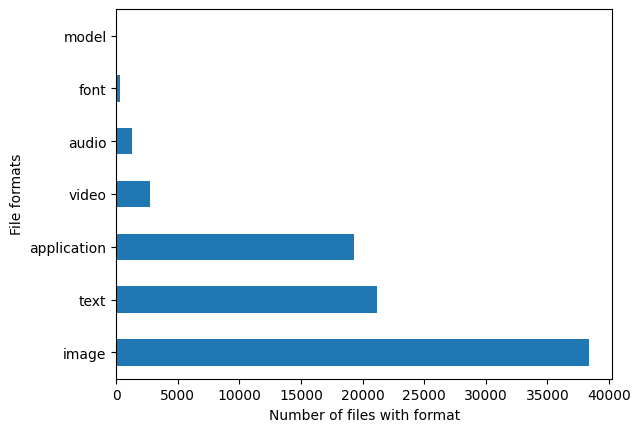

In [118]:
format_count = df["format"]
make_simple_format = lambda f: f.split("/")[0]
format_count = format_count.apply(make_simple_format)
format_count.value_counts().plot.barh(xlabel="Number of files with format", ylabel="File formats", label="Number of files")

if SAVE: 
    plt.savefig(SAVE_PATH+"format_file_count.png",bbox_inches='tight')

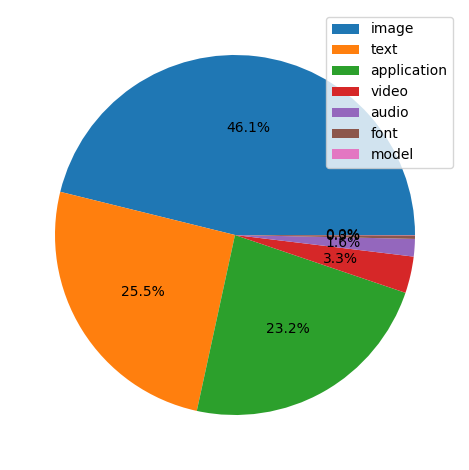

In [119]:
fvc = format_count.value_counts()
fvc = fvc.reindex(fvc.keys())
fig, ax = plt.subplots()
ax.pie(fvc, autopct='%1.1f%%')
plt.legend(fvc.keys(), loc="upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()


if SAVE: 
    plt.savefig(SAVE_PATH+"format_file_count_pie.png",bbox_inches='tight')


In [120]:
#import numpy as np
#file_type_size = defaultdict(int)
#for i,t in enumerate(df["filename"]):
#    ftype = str(t).split(".")[-1]
#    ftype = ''.join([c for c in ftype if not c.isdigit()])
#    if ftype == "":
#        ftype = str(t)
#    file_type_size[ftype] += int(df["size"][i])
#
#file_type_count = dict(file_type_count)
#file_type_size = { t:s for t,s in file_type_size.items() if s > 2**2}
#file_type_size = reversed_sort_dict_by_value(file_type_size)
#
#file_type_size = pd.DataFrame({"filetype": list(file_type_size.keys()), "size":list(file_type_size.values())})
#file_type_size = file_type_size.set_index("filetype")
#file_type_size.plot.barh()
#plt.title("Files extinction sizes")
#plt.xlabel("sum size in bytes")
#plt.ylabel("File extension ")
#
#
#if SAVE: 
#    plt.savefig(SAVE_PATH+"file_extinction_size.png",bbox_inches='tight')

60790


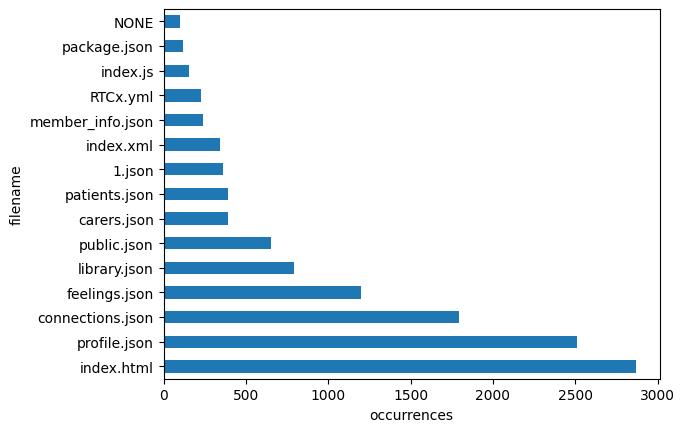

In [121]:

file_names_count = df["filename"].value_counts()
print(len(df["filename"].unique()))
file_names_count = file_names_count[file_names_count >= 100]
file_names_count = reversed_sort_dict_by_value(file_names_count.to_dict())


file_names_count = pd.DataFrame({"filename": list(file_names_count.keys()), "occurrences per filename":list(file_names_count.values())})
file_names_count = file_names_count.set_index("filename")
file_names_count.plot.barh(legend=False)
#plt.title("Filename occurrences")
plt.xlabel("occurrences")


if SAVE: 
    plt.savefig(SAVE_PATH+"filename_count.png",bbox_inches='tight')


In [122]:
searchable = []
for i, filename in enumerate(df["filename"]): 
        if "readme.md" in str(filename).lower():
            searchable.append(df["cid"][i])
            print(df["cid"][i])
            print("-"*10)

print("Number of possible readme files: ",len(searchable))

QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP/README.md
----------
/ipfs/QmbZTsDJPgjDEqPiioxBTnYnsRDSqHMDFUBsALg9J5MNLU/datafeeds/README.md
----------
/ipfs/QmbZTsDJPgjDEqPiioxBTnYnsRDSqHMDFUBsALg9J5MNLU/datafeeds/udf/README.md
----------
/ipfs/QmcBe2ePTf8SDiuHH63gyQnoC1Bvx72hFJjAGZg7m8TSK7/blazor/css/open-iconic/README.md
----------
/ipfs/QmcBe2ePTf8SDiuHH63gyQnoC1Bvx72hFJjAGZg7m8TSK7/blazor/css/open-iconic/README.md.br
----------
/ipfs/QmcBe2ePTf8SDiuHH63gyQnoC1Bvx72hFJjAGZg7m8TSK7/blazor/css/open-iconic/README.md.gz
----------
/ipfs/QmecykvezTGQrwSzJWaZhJbjHr4UJt6ho3cgXvfDvVocsx/crypto-js/README.md
----------
/ipfs/QmecykvezTGQrwSzJWaZhJbjHr4UJt6ho3cgXvfDvVocsx/jquery/README.md
----------
QmPvkfXRzprSZ6vQUHPgc1qYERPGHG2TK68DweQPC6SmpB/README.md
----------
/ipfs/QmPvkfXRzprSZ6vQUHPgc1qYERPGHG2TK68DweQPC6SmpB/jspm_packages/github/AkeemMcLennon/dom2hscript@master/README.md
----------
/ipfs/QmPvkfXRzprSZ6vQUHPgc1qYERPGHG2TK68DweQPC6SmpB/jspm_packages/github/Weedshaker/virtual-dom@2.1.2

In [123]:
peers_with_index = []
for i,fn in enumerate(df["filename"]):
    p = df["cid"][i].split("/")[0]
    if "index.html" in str(fn) and not p in peers_with_index and p != "":
        peers_with_index.append(p)
print("Number of websites found:",len(peers_with_index))
print(peers_with_index)

Number of websites found: 94
['QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP', 'QmT1Ja1kcMh3E7xHWAc49N6BpXnWJDPCTMUWXDvnKAdvJu', 'QmT2SRqXr8KvmuQTnvxvKm6NaVy9ucYYPRpPiQp78GFP1w', 'Qma3747yKcgDfxay1gWHKMJmimeWA7Vi7xoVE6KR2oyhdW', 'QmezUGmr8aGCkyBEcCGVDVQQP6mNgmmhCXYZCW5HYYXD62', 'QmdvJFBWbwui53tWpZGGn4pArvUGL6318a3ytdn69v2yti', 'QmYjrZNcJ6TLEbZySfTDs4NdkeohPGFTmtD4ZiCVmmLMPU', 'QmYjL57tJpxS4LTsyvkwBiusF9xsuoUyiY5pab6GcMj9jx', 'QmTE9NDErW7C81RqvNTzATKQET7SRrU3BzrywNzu1iXWWX', 'QmWm5gdnxrgdDmpu8JNSsNCihTBw7J3akqXYqyGe7zSi28', 'QmbZTsDJPgjDEqPiioxBTnYnsRDSqHMDFUBsALg9J5MNLU', 'QmR8UuZGuAo7PSVDxzLSDKoThShAzsvLrs3EmmCaUoajGx', 'QmUPRNuNmKPgzCPrexfgZXsPqghmanDrGRSBE5BY59APa4', 'QmcBe2ePTf8SDiuHH63gyQnoC1Bvx72hFJjAGZg7m8TSK7', 'QmS8DvEzaK37nCdkFAP5SFgJgcwF3oM6VRjsHVzhrToBat', 'Qmc3Q8nU9R3GKHmPKEFwPXnsM7zqx3MFjRDVnHrBAYAPAf', 'QmNoBHWTxaKNFccPtq6RS2W9sivxLddfaro9xfCb8C1iwA', 'QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC', 'Qmab2TwXBgVgRra6SnA

format count relative to node size, meaning that files that occurs often on a lot of different nodes are the most relevant nodes.  

Peers with html: 127
Peers with md: 17
20


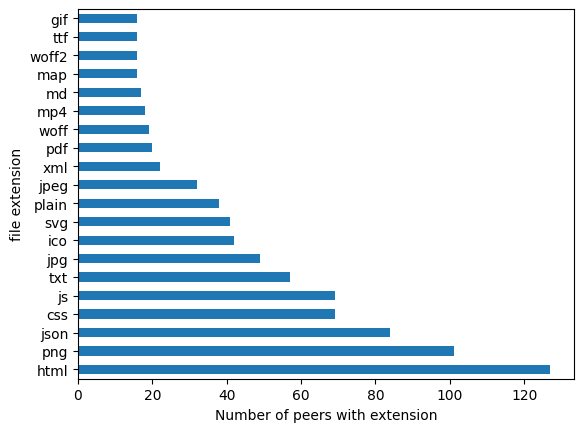

In [124]:
file_extension_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 15
for i,fn in enumerate(df["filename"]):
    file_extension = str(fn).split(".")[-1]
    if file_extension == "NONE" or file_extension == "nan":
        file_extension = df["format"][i].split(";")[0].split("/")[-1]
    peer = df["peer"][i]
    file_extension_peer_distribution[file_extension].add(peer)
print("Peers with html:",len(file_extension_peer_distribution["html"]))
print("Peers with md:",len(file_extension_peer_distribution["md"]))
file_extension_peer_distribution= {p:len(s) for p,s in file_extension_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
print(len(file_extension_peer_distribution))
file_extension_peer_distribution = reversed_sort_dict_by_value(file_extension_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(file_extension_peer_distribution.keys()), "Number of peers": list(file_extension_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh(legend=False)
#plt.title("Peers with file extension")
plt.xlabel("Number of peers with extension")


if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension.png",bbox_inches='tight')

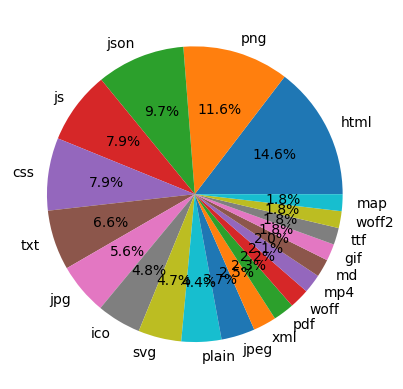

In [125]:
unique_nr_peers = len(df["peer"].unique())
file_extension_peer_distribution_prec = {p:s / unique_nr_peers for p,s in file_extension_peer_distribution.items()}
file_extension_peer_distribution_prec = reversed_sort_dict_by_value(file_extension_peer_distribution_prec)
fig, ax = plt.subplots()
ax.pie(list(file_extension_peer_distribution_prec.values()), labels=list(
    file_extension_peer_distribution_prec.keys()), autopct='%1.1f%%')
#plt.title("File extension hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension_pie.png",bbox_inches='tight')

In [126]:
cnt = 0 
for i,cid in enumerate(df["cid"].unique()):
    if cid:
        cnt+=1
print(cnt)

82003


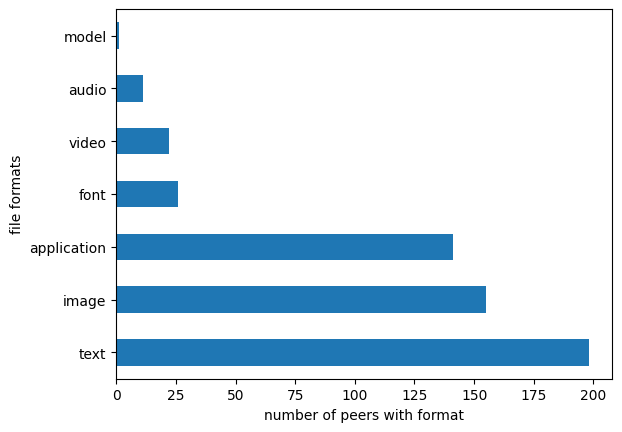

In [127]:
format_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 0

for i,fn in enumerate(df["filename"]):
    _format = df["format"][i].split("/")[0]
    peer = df["peer"][i]
    format_peer_distribution[_format].add(peer)

format_peer_distribution = {p:len(s) for p,s in format_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
format_peer_distribution = reversed_sort_dict_by_value(format_peer_distribution)
fe_df = pd.DataFrame({"file formats":list(format_peer_distribution.keys()), "Number of peers": list(format_peer_distribution.values())})
fe_df = fe_df.set_index("file formats")
fe_df.plot.barh(legend=False)
#plt.title("Peers with format")
plt.xlabel("number of peers with format")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format.png",bbox_inches='tight')

333 7


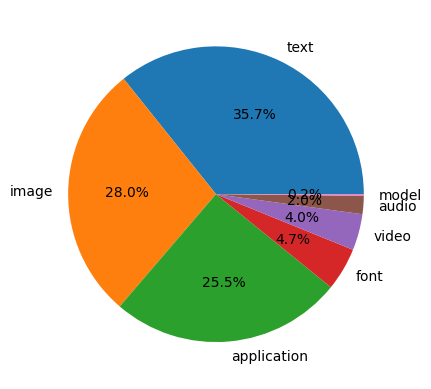

In [128]:
unique_nr_peers = len(df["peer"].unique())
print(unique_nr_peers, len(format_peer_distribution))
format_peer_distribution_prec = {p.split("/")[0]:s for p,s in format_peer_distribution.items() if s > 0}
fig, ax = plt.subplots()
ax.pie(list(format_peer_distribution_prec.values()), labels=list(
    format_peer_distribution_prec.keys()), autopct='%1.1f%%')
#plt.title("Format hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format_pie_simple.png",bbox_inches='tight')

In [129]:

formats:dict = defaultdict(int)
for f in df["format"]: 
    formats[f] += 1



### Looking at the times of found peers


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [131]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "time.csv")
df = drop_none_unique_peers(df)
print(len(df))
df.head()

35054


,index,peer,time,cid
0,1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,2023-07-03 09:55:16,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
1,2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,2023-07-03 09:56:20,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
2,13,12D3KooWL5rvBiZBE9NDWYfbCGSTfQpbScQPxDTfutLbVB...,2023-07-03 10:00:53,NONE
3,24,12D3KooWLqoT92535eKyJeECYQDoRihZs7PQLE3MEC2Z7u...,2023-07-03 10:03:34,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
4,26,12D3KooWDDDV1iEDURwPMtipAuUEjgGQ8y7TvMGkHwrXv8...,2023-07-03 10:03:36,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn


In [132]:
df['time'] = pd.to_datetime(df['time'])
df = df[df["peer"] != MY_PEERID]
print(len(df['peer'].unique()))

35054


Text(0.5, 0, 'number of restarts')

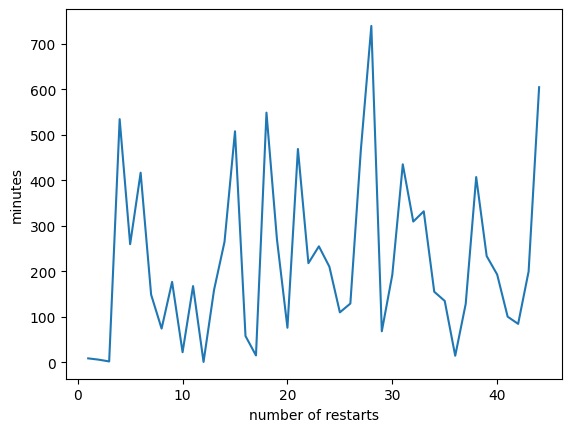

In [133]:
crashes = pd.read_csv(DATA_STORE_PATH_BASE + "node_crash.csv")
crashes["time"] = pd.to_datetime(crashes["time"])
time_diff = crashes['time'].diff().dt.total_seconds() / 60
time_diff.plot()
plt.ylabel("minutes")
plt.xlabel("number of restarts")

324


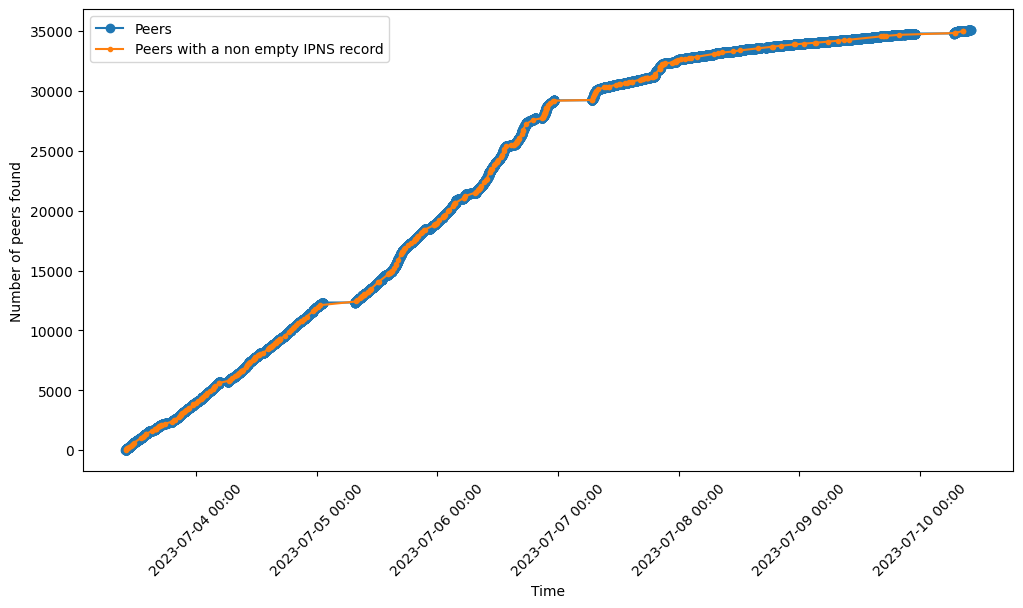

In [134]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
x = df["time"]
y = df.index.to_list()
df = df[df["cid"] != EMPTY_CID]
df = df[df["cid"] != "NONE"]
print(len(df))
plt.xlabel('Time')
plt.ylabel('Number of peers found')
#plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(x, y, marker='o', label="Peers")
plt.plot(df['time'], df.index, marker='.', label="Peers with a non empty IPNS record")
#plt.scatter(crashes["time"], [1]*len(crashes), marker="$S$", label="Restarts", color="red")
plt.legend()

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_time.png",bbox_inches='tight')

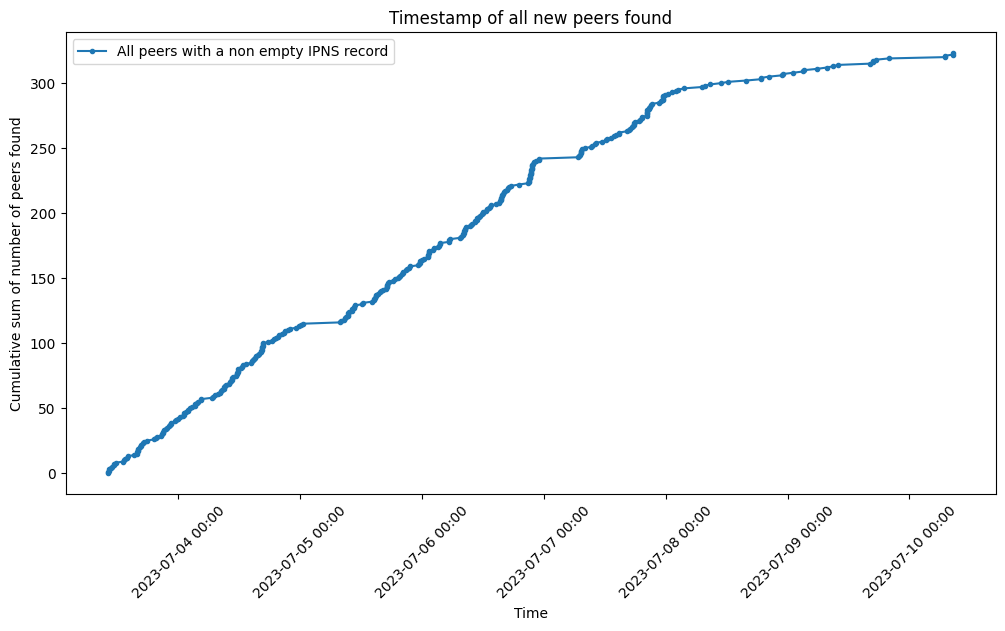

In [135]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
plt.xlabel('Time')
plt.ylabel('Cumulative sum of number of peers found')
plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(df['time'], df.index, marker='.', label="All peers with a non empty IPNS record")
plt.legend()
plt.show()


30.934984520123837

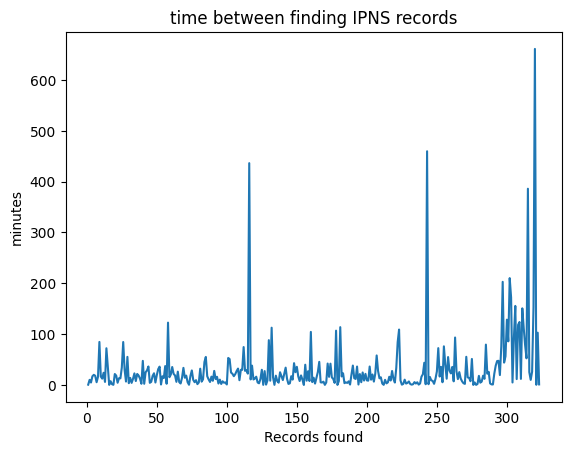

In [136]:
time_diff = df['time'].diff().dt.total_seconds() / 60
time_diff.plot()
plt.ylabel("minutes")
plt.xlabel("Records found")
plt.title("time between finding IPNS records")

time_diff.mean()


In [137]:
df = df[df["cid"] != EMPTY_CID]
df = df[df["cid"] != "NONE"]
print(len(df['peer'].unique()))

324


### Number of peers hosting cids

In [138]:
from collections import defaultdict
import matplotlib.ticker as ticker

In [139]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "number_of_hosts.csv")
df = drop_none_unique_peers(df)
print(len(df["peer"].unique()))
df.head()

334


,index,cid,peer,other_peers
0,0,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,12D3KooWEbtpN5F2jqtEUQZnveRgsE3kWSyZbCtzgwc8XP...,12D3KooWHmEdF3PpiUWFSSc8oJZnwtLpFFNVhLVQxXrCVg...
1,1,QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU,QmYGVgGGfD5N4Xcc78CcMJ99dKcH6K6myhd4Uenv5yJwiJ,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...
2,2,QmZUcj7w6WALSvupbGh6hTzWC3yN9aGgHcdXTSWXXuh2rP,12D3KooWEMCvm5EpGTVYeWVm8bCzeCAgRPRgLi9HV4GUfF...,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...
3,3,bafybeiav25f3lduu6x2ljzjmctocac3k5xh2tph5ihpv6...,12D3KooWBMo99iEN3u4uuy2N8pTtnSiTiecvc83sHj48xi...,12D3KooWBMo99iEN3u4uuy2N8pTtnSiTiecvc83sHj48xi...
4,4,QmUU2HcUBVSXkfWPUc3WUSeCMrWWeEJTuAgR9uyWBhh9Nf,12D3KooWJ89EV5wjkfHDCtoa6p9f9JPiJoawy6WS83W8Yw...,12D3KooWCwgMCwEubQoh8w9BCy8euS7rEs2K7jHU8oejFc...


In [140]:
cid_hosts_count = defaultdict(int)
#df = df[df["cid"] != EMPTY_CID]
for i, peers in enumerate(df["other_peers"]):
    if not pd.notna(peers):
        cid_hosts_count[i] += 0
    else:
        filtered_peers = [p for p in peers.split(",") if p != MY_PEERID]
        nr_peers = len(filtered_peers)
        cid_hosts_count[i] += nr_peers
        
print("number of peer",len(cid_hosts_count))
#cid_hosts_count = {k:v for k,v in cid_hosts_count.items() if v != 20}
cid_hosts_count = reversed_sort_dict_by_value(cid_hosts_count)
list(cid_hosts_count.values())[0]

number of peer 334


20

max: 20
min: 0
mean: 2.4790419161676644
sum: 828


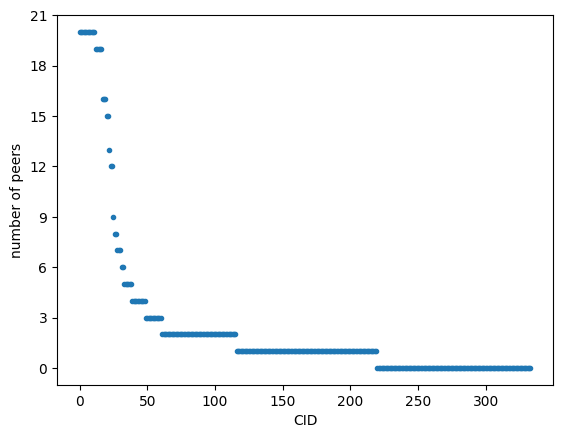

In [141]:
cid_hosts = pd.DataFrame({"cid":list(range(len(cid_hosts_count))), "peers":list(cid_hosts_count.values())})


cid_hosts = cid_hosts.set_index("cid")
print("max:", cid_hosts.values.max())
print("min:", cid_hosts.values.min())
print("mean:",cid_hosts.values.mean())
print("sum:", cid_hosts.values.sum())
fig, ax = plt.subplots()
ax.scatter(x=list(range(len(cid_hosts_count))), y=list(cid_hosts_count.values()), marker=".")
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
#plt.title("Number of peers hosting a CID")
plt.ylabel("number of peers")
plt.xlabel("CID")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_hosting_cids.png",bbox_inches='tight')


## Rate of change 

In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [143]:

def get_initial_set(file_path):
    df_nodes_set = pd.read_csv(file_path)
    df_nodes_set.drop('time', axis=1, inplace=True)
    df_nodes_set = df_nodes_set.sort_values("peer")
    df_nodes_set = df_nodes_set.drop_duplicates(subset="peer")
    df_nodes_set.reset_index(drop=True, inplace=True)
    return df_nodes_set


In [144]:
def week_compare_data(file):
    df = pd.read_csv(file)
    df.drop('time', axis=1, inplace=True)
    peer_counts = df['peer'].value_counts()
    df[df['peer'].isin(peer_counts[peer_counts == 1].index)]
    df = df.sort_values("peer")
    df = df.drop_duplicates(subset="peer")
    df.reset_index(drop=True, inplace=True)
    return df

In [145]:

week_files = [f"../store/week{w}/time.csv" for w in range(1,5)]
print(week_files)
def get_change_perc(init_set, week_files):
    changed_peers = [1]
    for f in week_files:
        week_df = week_compare_data(f)
        intersection = init_set.merge(week_df, how='inner') 
        perc_change =  len(intersection) / len(init_set)
        changed_peers.append(perc_change)
    return changed_peers

def get_change_perc_of_week(init_set, week_files):
    changed_peers = [1]
    for f in week_files:
        week_df = week_compare_data(f)
        intersection = init_set.merge(week_df, how='inner') 
        perc_change =  len(intersection) / len(week_df)
        changed_peers.append(perc_change)
    return changed_peers

def get_change(init_set, week_files):
    changed_peers = [len(init_set)]
    for f in week_files:
        week_df = week_compare_data(f)
        intersection = init_set.merge(week_df, how='inner') 
        changed_peers.append(len(intersection))
    return changed_peers

def get_change_reverse(init_set, week_files):
    changed_peers = [0]
    for f in week_files:
        week_df = week_compare_data(f)
        intersection = init_set.merge(week_df, how='inner') 
        changed_peers.append(len(week_df)-len(intersection))
    return changed_peers

['../store/week1/time.csv', '../store/week2/time.csv', '../store/week3/time.csv', '../store/week4/time.csv']


In [146]:
import math
inv_x = lambda x: 1/(1+x**2)
inv_x_v = np.vectorize(inv_x)
inv_x_res = inv_x_v(np.array([0,1,2,3]))

[35160, 3291, 2412, 2519]


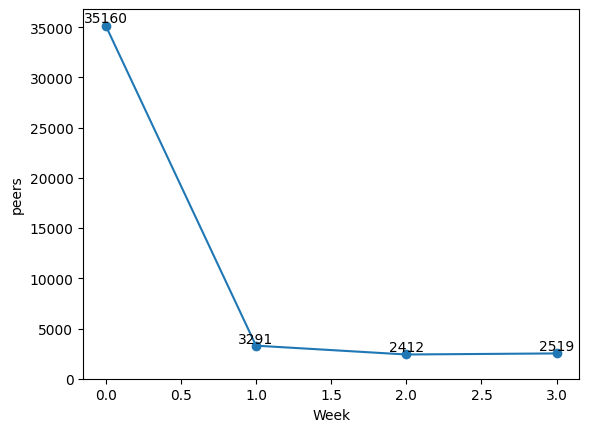

In [147]:
changed_peers = get_change(get_initial_set(week_files[0]), week_files[1:])
print(changed_peers)
fig, ax = plt.subplots()
ax.plot([0,1,2,3], changed_peers, marker="o", label="peers")
#ax.plot([0,1,2,3], inv_x_res, marker="o", label="approximation")
for (xi, yi) in zip([0,1,2,3], changed_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')
ax.set_ylim(ymin=0)
plt.xlabel("Week")
plt.ylabel("peers")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_rate_of_change.png",bbox_inches='tight')

[0, 236, 174, 208]


Text(0, 0.5, 'peers')

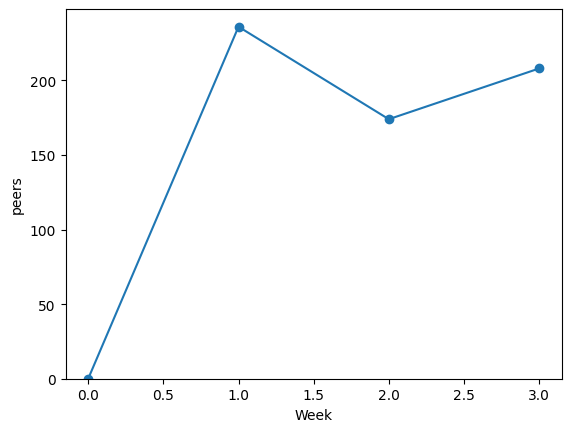

In [148]:
changed_peers = get_change_reverse(get_initial_set(week_files[0]), week_files[1:])
print(changed_peers)
fig, ax = plt.subplots()
ax.plot([0,1,2,3], changed_peers, marker="o", label="peers")
#ax.plot([0,1,2,3], inv_x_res, marker="o", label="approximation")
ax.set_ylim(ymin=0)
plt.xlabel("Week")
plt.ylabel("peers")

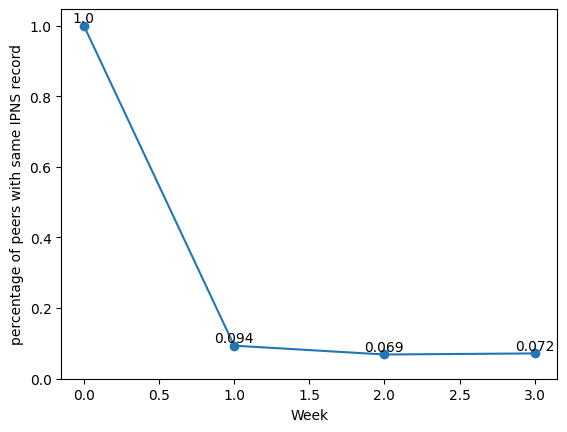

In [149]:
changed_peers = get_change_perc(get_initial_set(week_files[0]), week_files[1:])
fig, ax = plt.subplots()
ax.plot([0,1,2,3], changed_peers, marker="o", label="percentage of peers")
#ax.plot([0,1,2,3], inv_x_res, marker="o", label="approximation")
for (xi, yi) in zip([0,1,2,3], [float("%.3f" % c) for c in changed_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')
ax.set_ylim(ymin=0)
plt.xlabel("Week")
plt.ylabel("percentage of peers with same IPNS record")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_rate_of_change_perc.png",bbox_inches='tight')

0.9298426443133465


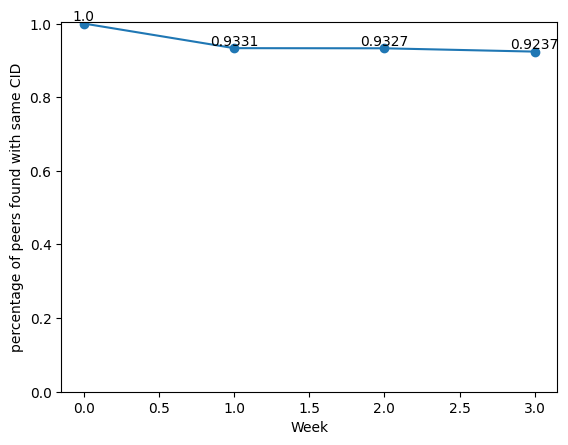

In [154]:
changed_peers = get_change_perc_of_week(get_initial_set(week_files[0]), week_files[1:])
print(np.mean(changed_peers[1:]))
fig, ax = plt.subplots()
ax.plot([0,1,2,3], changed_peers, marker="o", label="percentage of peers")
#ax.plot([0,1,2,3], inv_x_res, marker="o", label="approximation")
for (xi, yi) in zip([0,1,2,3], [float("%.4f" % c) for c in changed_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')
ax.set_ylim(ymin=0)
plt.xlabel("Week")
plt.ylabel("percentage of peers found with same CID")

if SAVE: 
    plt.savefig(SAVE_PATH+"found_peers_rate_of_change_perc.png",bbox_inches='tight')

1/(1.0000063775517671 + 0.07009080720373903*(x**0.1210235794466545))


/tmp/ipykernel_42690/3302578831.py:3: RuntimeWarning: divide by zero encountered in power
  model = lambda x, a, b,c: 1/(a+b*(x**c))


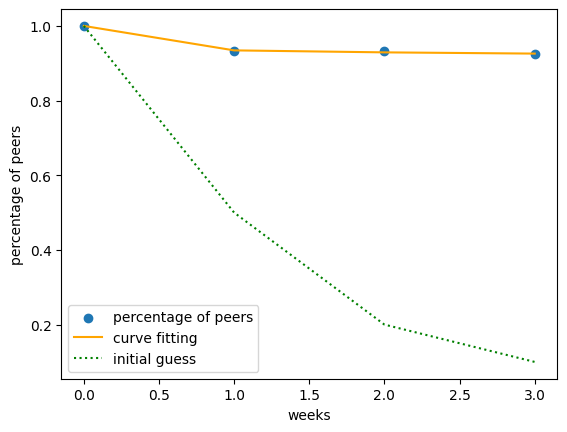

In [ ]:
from scipy.optimize import curve_fit

model = lambda x, a, b,c: 1/(a+b*(x**c)) 
hypo = lambda x :  1/(1+x**2)
x_data = [0,1,2,3]
y_data = changed_peers


popt, pcov = curve_fit(model, x_data, y_data, p0=[1,1, 2])

y_opt = [model(x, popt[0], popt[1], popt[2]) for x in x_data]
y_hypo = [hypo(x) for x in x_data]

fig, ax = plt.subplots()
ax.scatter(x_data, y_data,  marker="o", label="percentage of peers")
ax.plot(x_data, y_opt,  label="curve fitting",color="orange")
ax.plot(x_data, y_hypo,  linestyle="dotted", label="initial guess",color="green")
plt.ylabel("percentage of peers")
plt.xlabel("weeks")
plt.legend()

print(f"1/({popt[0]} + {popt[1]}*(x**{popt[2]}))")

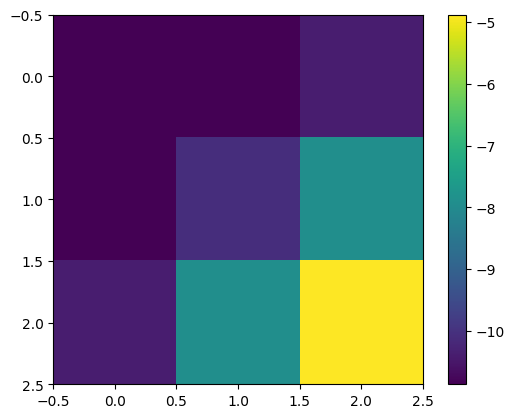

In [ ]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_rate_of_change_param_fit_cov.png",bbox_inches='tight')

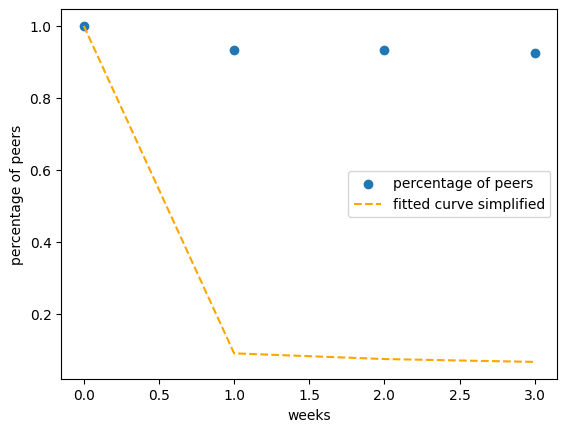

In [ ]:

curve_fit_simple = lambda x: 1/(1+10*x**0.3)
y_fit_simple = [curve_fit_simple(x) for x in x_data]
fig, ax = plt.subplots()
ax.scatter(x_data, y_data,  marker="o", label="percentage of peers")
ax.plot(x_data, y_fit_simple,  linestyle="dashed", label="fitted curve simplified",color="orange")
plt.ylabel("percentage of peers")
plt.xlabel("weeks")
plt.legend()

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_rate_of_change_curve_fit_simple.png",bbox_inches='tight')

[-0.06691239 -0.03364269 -0.00468095 -0.00898891]


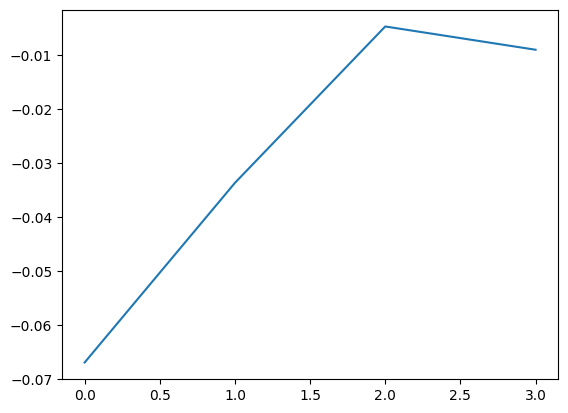

In [ ]:
y = changed_peers
x = [0,1,2,3]

derivative = np.gradient(y, x)
print(derivative)
fig, ax = plt.subplots()
ax.plot(x, derivative)

## crashes 

In [ ]:
df = pd.read_csv("../store/week1/node_crash.csv")
df.tail()

,time,crashed
40,2023-07-09 14:23:36,started
41,2023-07-09 16:03:41,started
42,2023-07-09 17:27:52,started
43,2023-07-09 20:47:24,started
44,2023-07-10 06:52:04,started


In [ ]:
df['time'] = pd.to_datetime(df['time'])

Text(0.5, 0, 'isinstance of crashing')

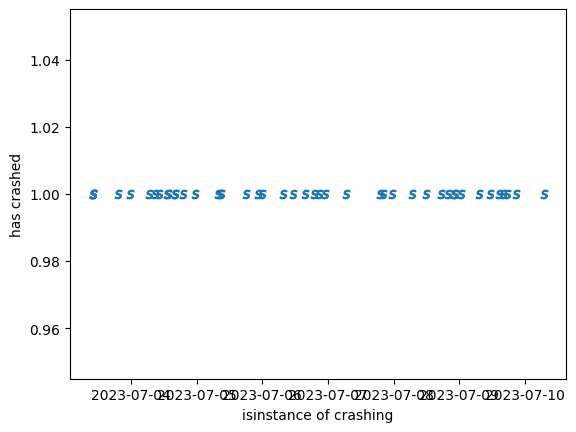

In [ ]:

plt.scatter(x=df["time"], y=[1]*len(df), marker="$S$")
plt.ylabel("has crashed")
plt.xlabel("isinstance of crashing")

## checking 

In [ ]:
import typing
def get_timed_checked(files) -> typing.List[pd.DataFrame]: 
    all_checked = []
    for f in files:
        checked = pd.read_csv(f)
        checked["time"] = pd.to_datetime(checked["time"])
        checked = drop_none_unique_peers(checked)
        all_checked.append(checked)
    return all_checked
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
checks = get_timed_checked(week_files) 
checks[0].head()

,index,peer,time,cid
0,0,12D3KooWKnxvF2bF9M2YfyGdf8XYCbpoUYJe5qWP8MQfpV...,2023-07-17 05:34:41,QmWZWRpAUjh3PUqED3Ps4aKhdyJGRZEyycgBgrfQLxNEg5...
1,1,QmSjGmuHCGDDennPzBQy1mjD918NrZ7XfGUfy3YQ7AH8LN,2023-07-17 05:38:47,QmY5jXoexekDfgQBgksr3bNXYamGdqR9hu9gpRZDM2fV5Y
2,2,12D3KooWFeHu75n14FDrSUDXbb7cXhRUJCYxsRCQLA8nZ9...,2023-07-17 05:39:46,ZCJ7vCLm6VphC9VUMyiWAnfk8eGTBSxd7SZj236r3oWBABVaq
3,3,12D3KooWKDQ7UkeL9TzTwLty6GuZzEkHdRm8qgcVLiiTZF...,2023-07-17 05:40:51,bafybeia47lwoqxe63utbcy3bgkgspsve34fs2rrrxeuax...
4,4,12D3KooWHou2VDpmvPUmv1bvuEBUdV6VTauzxAgb8xLUYS...,2023-07-17 05:42:48,bafybeih3eeqy6lnypxh3h5yfi7x7gcryhsf7xkh7h7srt...


[333, 45, 41, 40]


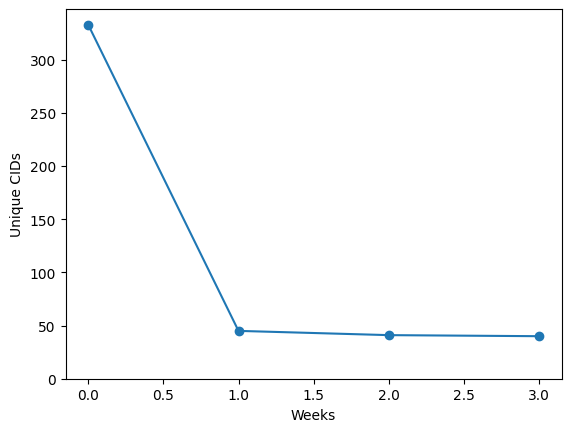

In [ ]:
unique_nr_cid = [333]
for c in checks:
    unique_nr_cid.append(len(c["cid"].unique()))
print(unique_nr_cid)

fig, ax = plt.subplots()
ax.plot([0,1,2,3], unique_nr_cid, marker="o", label="unique CIDs")
ax.set_ylim(ymin=0)
plt.xlabel("Weeks")
plt.ylabel("Unique CIDs")

if SAVE: 
    plt.savefig(SAVE_PATH+"rate_of_nonempty_peers.png",bbox_inches='tight')

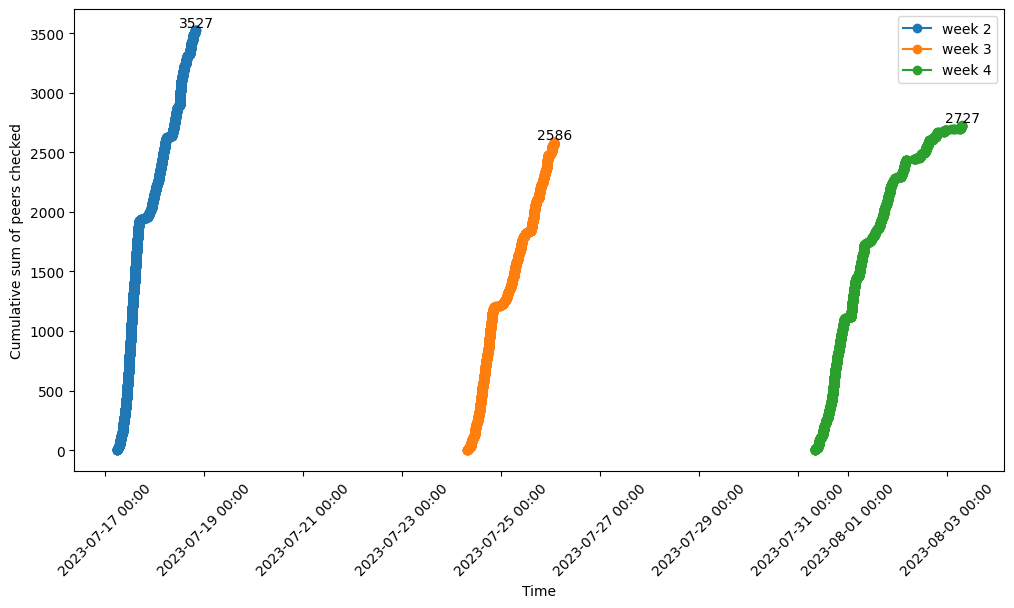

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Cumulative sum of peers checked')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
for i, checked in enumerate(checks):
    plt.plot(checked['time'], checked.index, marker='o', label=f"week {i+2}")
plt.legend()


for (xi, yi) in zip([t["time"][t["time"].last_valid_index()] for t in checks], [len(c) for c in checks]):
    plt.text(xi, yi, yi, va='bottom', ha='center')


if SAVE: 
    plt.savefig(SAVE_PATH+"check_peer_set_time.png",bbox_inches='tight')

[3527, 2586, 2441]


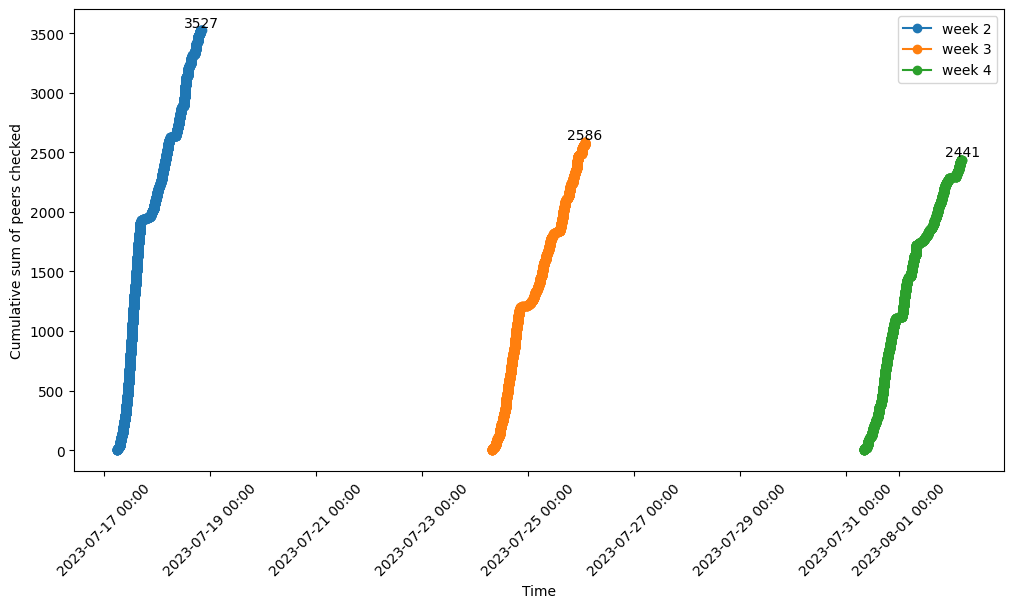

In [ ]:
with_out_crash = checks.copy()
with_out_crash[-1] = with_out_crash[-1][:2441]
print([len(c) for c in with_out_crash])

plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Cumulative sum of peers checked')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
for i, checked in enumerate(with_out_crash):
    plt.plot(checked['time'], checked.index, marker='o', label=f"week {i+2}")
plt.legend()

for (xi, yi) in zip([t["time"][t["time"].last_valid_index()] for t in with_out_crash], [len(c) for c in with_out_crash]):
    plt.text(xi, yi, yi, va='bottom', ha='center')

if SAVE: 
    plt.savefig(SAVE_PATH+"check_peer_set_time_with_out_crash.png",bbox_inches='tight')

[2611, 1591, 1724]


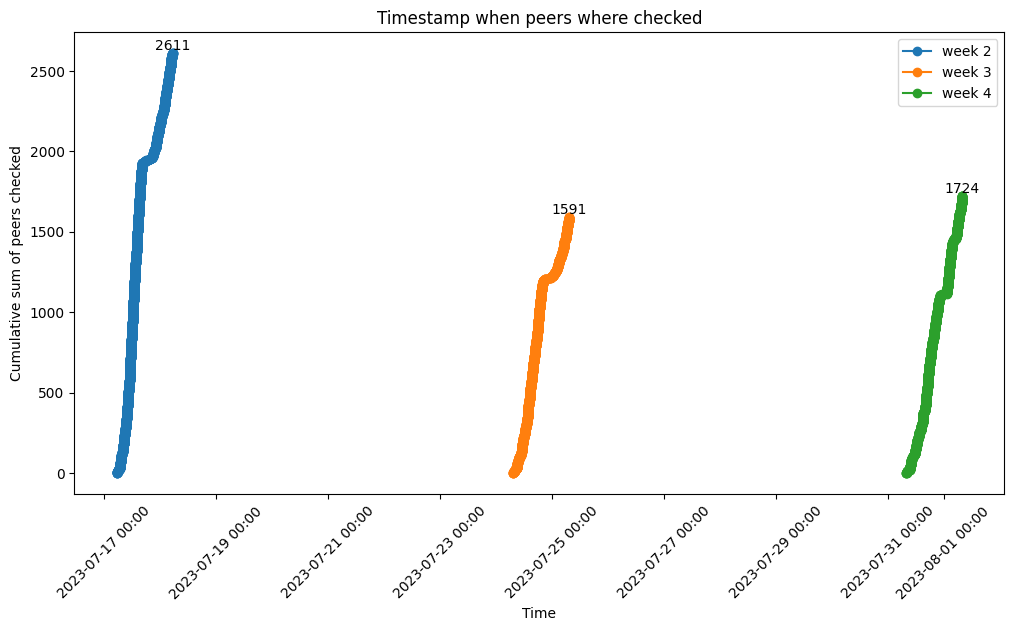

In [ ]:
from datetime import timedelta
window = []
number_of_peers = []
for df in checks:
    df['time'] = pd.to_datetime(df['time'])

    d = timedelta(hours=24)
    df = df[df['time'] < df['time'][0] + d]
    number_of_peers.append(len(df))
    window.append(df)
print(number_of_peers)

plt.figure(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Cumulative sum of peers checked')
plt.title('Timestamp when peers where checked')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

for i, checked in enumerate(window):
    plt.plot(checked['time'], checked.index, marker='o', label=f"week {i+2}")


for (xi, yi) in zip([t["time"][t["time"].last_valid_index()] for t in window], [len(c) for c in window]):
    plt.text(xi, yi, yi, va='bottom', ha='center')

plt.legend()
if SAVE: 
    plt.savefig(SAVE_PATH+"check_peer_set_time_24H.png",bbox_inches='tight')